<a href="https://colab.research.google.com/github/lynnkuan/python/blob/main/2330backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from matplotlib.pylab import mpl,plt

Round1:2330台積電5天30天SMA回測

In [41]:
data = pd.read_csv('2330TEJ.csv',index_col=0,parse_dates=True).dropna()
data.head()


,1M_high,3M_high,6M_high,9M_high,1Y_high,1M_low,3M_low,6M_low,9M_low,55d_SMA,...,SMA_750d,SMA_1250d,SMA_2500d,vol_55d_max,vol_65d_max,vol_240d_max,extra_1,extra_2,extra_3,extra_4
date,,,,,,,,,,,,,,,,,,,,,
2024-10-18,1085.0,1085.0000,1085.0000,1085.0000,1085.0000,957.0,811.3724,735.8533,617.9290,518.4828,...,4.711156e+07,4.674301e+07,4.313762e+07,3.363233e+07,2.272338e+07,2.140464e+07,1.384897e+07,159662.795,159662.795,176166.037
2024-10-17,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,580.4189,518.4828,...,4.639698e+07,4.573941e+07,4.268644e+07,3.328967e+07,2.260421e+07,2.132834e+07,1.381084e+07,159662.795,159662.795,176166.037
2024-10-16,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,573.5092,518.4828,...,4.631153e+07,4.520412e+07,4.248195e+07,3.311630e+07,2.253870e+07,2.129197e+07,1.379059e+07,159662.795,159662.795,176166.037
2024-10-15,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,518.4828,...,4.620621e+07,4.490201e+07,4.218943e+07,3.290072e+07,2.246822e+07,2.124772e+07,1.376794e+07,159662.795,159662.795,176166.037
2024-10-14,1045.0,1050.3042,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,518.4828,...,4.607861e+07,4.467899e+07,4.192664e+07,3.273591e+07,2.241006e+07,2.120631e+07,1.374866e+07,159662.795,159662.795,176166.037


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2024-10-18 to 2023-07-26
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1M_high       300 non-null    float64
 1   3M_high       300 non-null    float64
 2   6M_high       300 non-null    float64
 3   9M_high       300 non-null    float64
 4   1Y_high       300 non-null    float64
 5   1M_low        300 non-null    float64
 6   3M_low        300 non-null    float64
 7   6M_low        300 non-null    float64
 8   9M_low        300 non-null    float64
 9   55d_SMA       300 non-null    float64
 10  65d_SMA       300 non-null    int64  
 11  72d_SMA       300 non-null    float64
 12  125d_SMA      300 non-null    float64
 13  250d_SMA      300 non-null    float64
 14  750d_SMA      300 non-null    float64
 15  1250d_SMA     300 non-null    float64
 16  2500d_SMA     300 non-null    float64
 17  vol_55d       300 non-null    float64
 18  vol_65d    

In [43]:
data['SMA1'] = data['65d_SMA'].rolling(5).mean()
data['SMA2'] = data['65d_SMA'].rolling(100).mean()
filtered_data = data[['65d_SMA', 'SMA1', 'SMA2']]
filtered_data.tail()

,65d_SMA,SMA1,SMA2
date,,,
2023-08-01,567,558.4,548.800000
2023-07-31,565,561.0,549.500000
2023-07-28,567,562.8,550.533333
2023-07-27,569,565.8,551.533333
2023-07-26,566,566.8,552.333333


<ipython-input-44-7e4c781fcfd2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


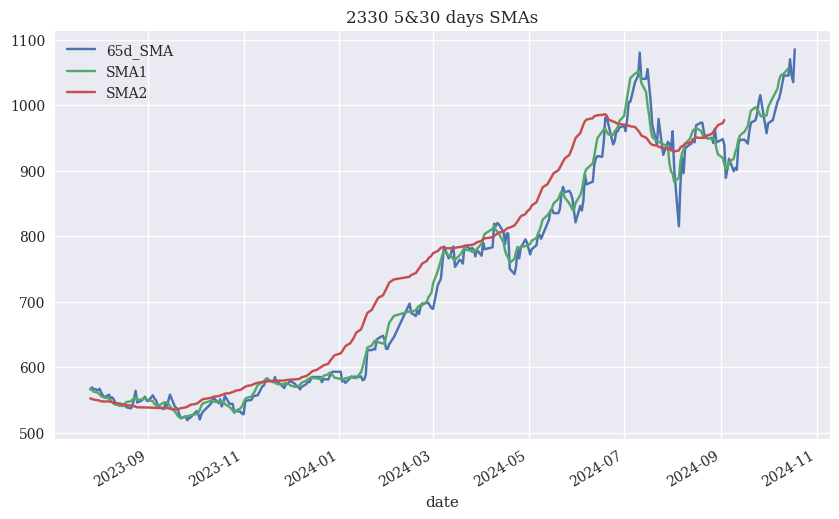

In [44]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

filtered_data.plot(title='2330 5&100 days SMAs',figsize=(10,6));

<ipython-input-45-51b1032e2fc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['position'] = np.where(filtered_data['SMA1']>filtered_data['SMA2'],1,-1)
<ipython-input-45-51b1032e2fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


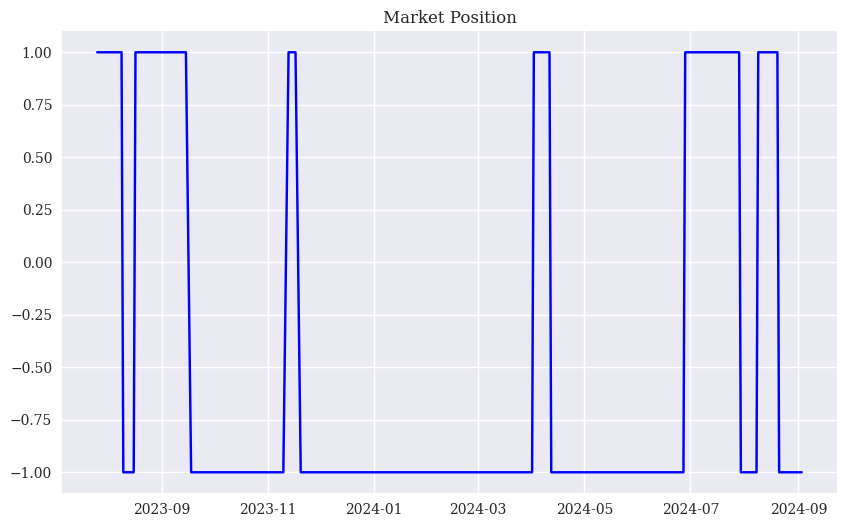

In [45]:
filtered_data['position'] = np.where(filtered_data['SMA1']>filtered_data['SMA2'],1,-1)
filtered_data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['position'], color='blue')
plt.ylim([-1.1, 1.1])
plt.title('Market Position')
plt.show()


<ipython-input-46-a757c8c8eee1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['return'] = np.log(filtered_data['65d_SMA']/filtered_data['65d_SMA'].shift(1))


<Axes: >

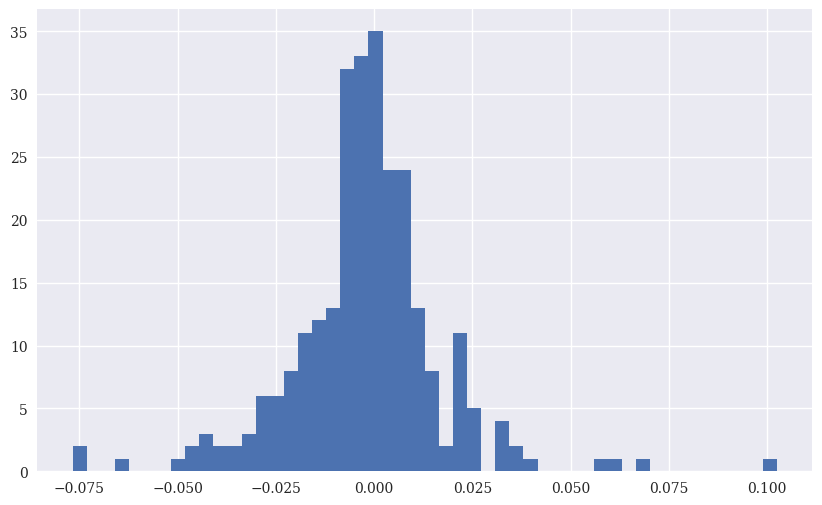

In [46]:
filtered_data['return'] = np.log(filtered_data['65d_SMA']/filtered_data['65d_SMA'].shift(1))
filtered_data['return'].hist(bins=50,figsize=(10,6))

In [47]:
filtered_data['strategy'] = filtered_data['position'].shift(1)*filtered_data['return']
filtered_data.dropna(inplace=True)

<ipython-input-47-9847ebad3cdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['strategy'] = filtered_data['position'].shift(1)*filtered_data['return']
<ipython-input-47-9847ebad3cdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


In [51]:
filtered_data[['return','strategy']].sum()  #logReturn

,0
return,-0.507286
strategy,0.153932


In [52]:
filtered_data[['return','strategy']].sum().apply(np.exp)  #TotalReturn 複利效應

,0
return,0.602128
strategy,1.166412


<Axes: xlabel='date'>

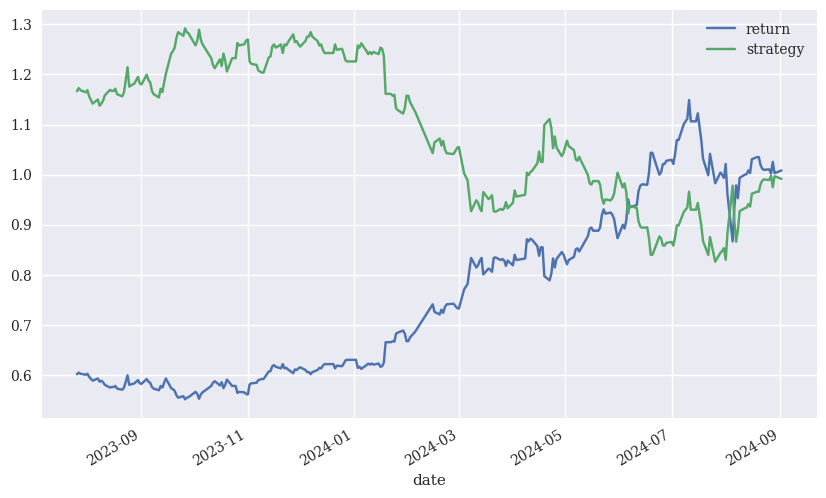

In [54]:
filtered_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
#累積log回報相加再轉指數回報率

In [58]:
#平均對數報酬
averagelogreturn = filtered_data[['return','strategy']].mean()*100
print(averagelogreturn)

#年平均報酬
yearaveragereturn = filtered_data[['return','strategy']].mean()*100-1
print(yearaveragereturn)

#平均對數報酬標準差
stdaveragelogreturn = filtered_data[['return','strategy']].std()*100**0.5
print(stdaveragelogreturn)

#年平均報酬標準差
stdyearreturn = (filtered_data[['return','strategy']].apply(np.exp)-1).std()*100**0.5
print(stdyearreturn)

return     -0.187884
strategy    0.057012
dtype: float64
return     -1.187884
strategy   -0.942988
dtype: float64
return      0.194058
strategy    0.194885
dtype: float64
return      0.194398
strategy    0.194947
dtype: float64


關注「回檔最長持續時間」&「回檔最大跌幅」

<ipython-input-60-49938efbbf1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cumret'] = filtered_data['strategy'].cumsum().apply(np.exp)        #總體績效隨時間變化相應值
<ipython-input-60-49938efbbf1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cummax'] = filtered_data['cumret'].cummax()


<Axes: xlabel='date'>

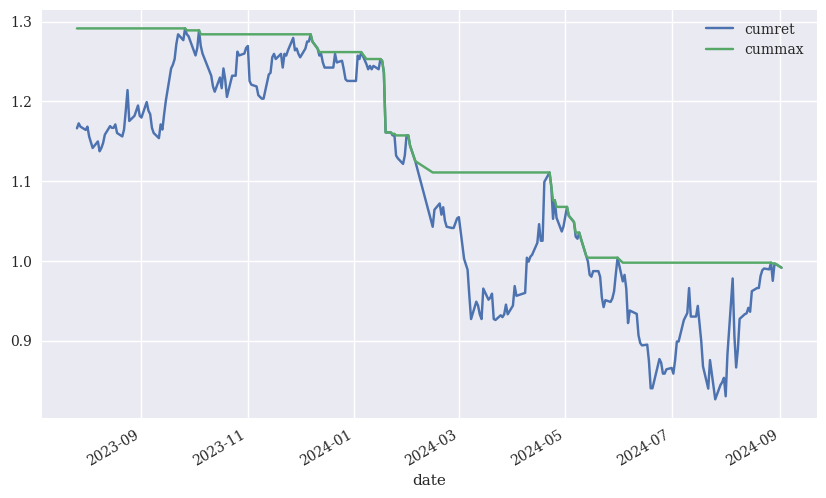

In [60]:
filtered_data['cumret'] = filtered_data['strategy'].cumsum().apply(np.exp)        #總體績效隨時間變化相應值
filtered_data['cummax'] = filtered_data['cumret'].cummax()

filtered_data[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [61]:
#計算回檔最大跌幅
drawndown = filtered_data['cummax'] - filtered_data['cumret']
drawndown.max()

0.18501849661330383

In [63]:
#計算回檔最長持續時間
temp = drawndown[drawndown==0]
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
print(periods)

[datetime.timedelta(days=-3) datetime.timedelta(days=-1)
 datetime.timedelta(days=-2) datetime.timedelta(days=-88)
 datetime.timedelta(days=-18) datetime.timedelta(days=-3)
 datetime.timedelta(days=-1) datetime.timedelta(days=-3)
 datetime.timedelta(days=-3) datetime.timedelta(days=-1)
 datetime.timedelta(days=-7) datetime.timedelta(days=-2)
 datetime.timedelta(days=-1) datetime.timedelta(days=-77)
 datetime.timedelta(days=-3) datetime.timedelta(days=-1)
 datetime.timedelta(days=-1) datetime.timedelta(days=-7)
 datetime.timedelta(days=-2) datetime.timedelta(days=-3)
 datetime.timedelta(days=-1) datetime.timedelta(days=-1)
 datetime.timedelta(days=-1) datetime.timedelta(days=-11)
 datetime.timedelta(days=-25) datetime.timedelta(days=-3)
 datetime.timedelta(days=-1) datetime.timedelta(days=-64)
 datetime.timedelta(days=-8)]


In [64]:
periods.max()

datetime.timedelta(days=-1)

In [66]:
import SMAVectorBacktester as SMA

smbt = SMAVectorBacktester(data['65d_SMA'],5,100,
                           '2024-1-1','2024-10-15')

smbt.fun_strategy()
smbt.plot_results()

ModuleNotFoundError: No module named 'SMAVectorBacktester'